Introduction to social Networks

In [ ]:
from IPython.display import display, Math, Latex


$$e^{i\pi} + 1 = 0$$


In [5]:
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))


<IPython.core.display.Math object>

| This | is   |
|------|------|
|   a  | table|

# Network Mapping

La obtención de los datos para la construcción de la red requirió del uso de dos APIs de Twitter:
* Twitter API
* Tweepy   


Twitter API fue utilizado para la construcción de la red y  Tweepy para obtener información acerca de los actores.

In [17]:
#import twitter
import networkx as nx
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from tweepy import OAuthHandler
#from tweepy import API
#from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import pandas as pd

# Token
Claves que provee twitter a los desarrolladores para hacer hacer consulta de la información disponible en la Red Social.

CONSUMER_KEY = '******************************'
CONSUMER_SECRET = '************************************'
OAUTH_TOKEN = '*********************************************'
OAUTH_SECRET = '**********************************************'

# Twitter api

Por seguridad fue puesto sleep_on_rate_limit=True para que las peticiones paren cuando se ha llegado a un límite y se restablezcan después de un periodo.

Este limite es impuesto por Twitter y despende del trafico de peticiones.

api = twitter.Api(consumer_key=CONSUMER_KEY,
                      consumer_secret=CONSUMER_SECRET,
                      access_token_key=OAUTH_TOKEN,
                      access_token_secret=OAUTH_SECRET,
                 sleep_on_rate_limit=True)

# Tweepy

En el caso de Tweepy, no era necesario establecer un tiempo de retraso, ya que solo se usaba para obtener información sobre las consultas.

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)  
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET)  
auth_api = API(auth)

# Base de datos del universo marvel (actores)

In [39]:
df=pd.read_csv('MarvelUniverse.csv')
df.head()

,Real Name,Following,Character,Twitter
0,Samuel L. Jackson,869,Nick Fury,@SamuelLJackson
1,Robert Downey Jr,62,Tony Stark,@RobertDowneyJr
2,Paul Bettany,619,vision/jarvis,@Paul_Bettany
3,Tom Holland,98,Peter Parker,@TomHolland1996
4,Chris Evans,508,CaptianAmerica,@ChrisEvans


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
Real Name    54 non-null object
Following    54 non-null int64
Character    54 non-null object
Twitter      54 non-null object
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [4]:
df.describe()

,Following
count,54.000000
mean,437.425926
std,439.926649
min,13.000000
25%,150.500000
50%,249.500000
75%,619.750000
max,2215.000000


In [112]:
df["Following"].sum(axis = 0) 
#.sum(axis = 0, skipna = True) 

23621

### Información de las cuentas de los actores mediante el uso de Tweppy

In [113]:
ids=[]
followersCount=[]
followingsCount=[]
for i in df["Twitter"]:
    print("\nGetting data for " + i)
    item = auth_api.get_user(i)
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("statuses_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: ",item.followers_count)
    print("id: ", item.id)
    ids.append(item.id)
    followersCount.append(item.followers_count)
    followingsCount.append(item.friends_count)


Getting data for @SamuelLJackson
name: Samuel L. Jackson
screen_name: SamuelLJackson
description: 
statuses_count: 3547
friends_count: 869
followers_count:  8304646
id:  75974281

Getting data for @RobertDowneyJr
name: Robert Downey Jr
screen_name: RobertDowneyJr
description: You know who I am.
statuses_count: 636
friends_count: 62
followers_count:  14812970
id:  47786101

Getting data for @Paul_Bettany
name: Paul Bettany
screen_name: Paul_Bettany
description: https://t.co/kz61tgLg3H
statuses_count: 4567
friends_count: 619
followers_count:  492189
id:  2796910988

Getting data for @TomHolland1996
name: Tom Holland
screen_name: TomHolland1996
description: 
statuses_count: 1343
friends_count: 98
followers_count:  4872467
id:  624056226

Getting data for @ChrisEvans
name: Chris Evans
screen_name: ChrisEvans
description: 
statuses_count: 1486
friends_count: 589
followers_count:  13545033
id:  580097412

Getting data for @chrishemsworth
name: Chris Hemsworth
screen_name: chrishemsworth
des

name: Linda Cardellini
screen_name: lindacardellini
description: 
statuses_count: 400
friends_count: 245
followers_count:  66903
id:  56181543

Getting data for @Dastmalchian
name: David Dastmalchian
screen_name: Dastmalchian
description: the truth is out there... it’s actually staring us right in the face.  and yet here we are.
statuses_count: 15438
friends_count: 352
followers_count:  14320
id:  115786052

Getting data for @BenicioSource
name: Benicio del Toro
screen_name: BenicioSource
description: First account for news on actor Benicio del Toro #Soldado #TheLastJedi #EscapeAtDannemora
statuses_count: 3903
friends_count: 81
followers_count:  8665
id:  1116555368

Getting data for @OfficialKat
name: Kat Dennings
screen_name: OfficialKat
description: Detritus
statuses_count: 4672
friends_count: 620
followers_count:  1120877
id:  23544268

Getting data for @missjudygreer
name: judy greer
screen_name: missjudygreer
description: that girl from that movie/tv show (and author!) #idontknow

In [114]:
for i in range(len(df)):
    print("Id ", ids[i], "\tFollowers: ",followersCount[i], "\tFollowing: ",
          followingsCount[i],"\tReal Name: ",df["Real Name"][i])

Id  75974281 	Followers:  8304646 	Following:  869 	Real Name:  Samuel L. Jackson
Id  47786101 	Followers:  14812970 	Following:  62 	Real Name:  Robert Downey Jr
Id  2796910988 	Followers:  492189 	Following:  619 	Real Name:  Paul Bettany
Id  624056226 	Followers:  4872467 	Following:  98 	Real Name:  Tom Holland
Id  580097412 	Followers:  13545033 	Following:  589 	Real Name:  Chris Evans
Id  3063032281 	Followers:  6757678 	Following:  109 	Real Name:  Chris Hemsworth
Id  183404455 	Followers:  165330 	Following:  17 	Real Name:  Scarlett Johansson
Id  285282053 	Followers:  2892742 	Following:  189 	Real Name:  Gwyneth Paltrow
Id  228794007 	Followers:  824942 	Following:  351 	Real Name:  Don Cheadle
Id  22677790 	Followers:  2206747 	Following:  225 	Real Name:  Jon Favreau
Id  391037985 	Followers:  4244612 	Following:  1330 	Real Name:  Tom Hiddleston
Id  47285504 	Followers:  6430451 	Following:  1849 	Real Name:  Mark Ruffalo
Id  555448499 	Followers:  893808 	Following:  14

In [117]:

for i in range(len(df)):
    followers = []
    # Load data
    followers.extend(api.GetFriendIDs(user_id=ids[i]))
    # Create graph
    print(df["Real Name"][i])
    for user in followers:
        track=0
        for match in ids:
            if (user==match):
                Graph.add_edge(df["Real Name"][i],df["Real Name"][track])
            track+=1
    time.sleep(90)

Samuel L. Jackson
Robert Downey Jr
Paul Bettany
Tom Holland
Chris Evans
Chris Hemsworth
Scarlett Johansson
Gwyneth Paltrow
Don Cheadle
Jon Favreau
Tom Hiddleston
Mark Ruffalo
Cobie Smulders
Anthony Mackie
Jeremy Renner
Dave Bautista
Chadwick Boseman
Benedict Cumberbatch
Karen Gillan
Clark Gregg
Idris Elba
Stan Lee
Sean Gunn
chris pratt
Paul Rudd
Zoe Saldana
ASANO TADANOBU
Winston Duke
Danai Gurira
Anthony Hopkins
Pom Klementieff
Evangeline Lilly
Benedict Wong
Letitia Wright
Angela Bassett
Leslie Bibb
Linda Cardellini
David Dastmalchian
Benicio del Toro
Kat Dennings
Judy Greer
Djimon Hounsou
Brie Larson
Zachary Levi
Ross Marquand
Lee Pace
Abby Ryder Fortson
Andy Serkis
Garry Shandling
Ty Simpkins
Tessa Thompson
Emily VanCamp
Taika Waititi
Jeff Bridges


## Guardar el grafo obtenido de la red en un archivo Json

import json

from networkx.readwrite import json_graph

data1 = json_graph.node_link_data(Graph)
#H = nx.gn_graph(377)
data2 = json_graph.node_link_data(Graph, {'link': 'links', 'source': 'source', 'target': 'target'})

del data2['directed']
del data2['multigraph']
del data2['graph']
with open('dataUPYDAY.json', 'w') as fp:
    json.dump(data2, fp)

# Cargar el Archivo Json para crear el grafo

In [1]:
import json
from networkx.readwrite import json_graph
fileName="dataUPYDAY.json"

def read_json_file(fileName):
    with open(fileName) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

graph = read_json_file(fileName)

FileNotFoundError: [Errno 2] No such file or directory: 'dataUPYDAY.json'

In [10]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 51
Number of edges: 627
Average in degree:  12.2941
Average out degree:  12.2941


In [82]:
inDegree = [20*(val+1) for (node, val) in graph.in_degree()]
outDegree = [20*(val+1) for (node, val) in graph.out_degree()]

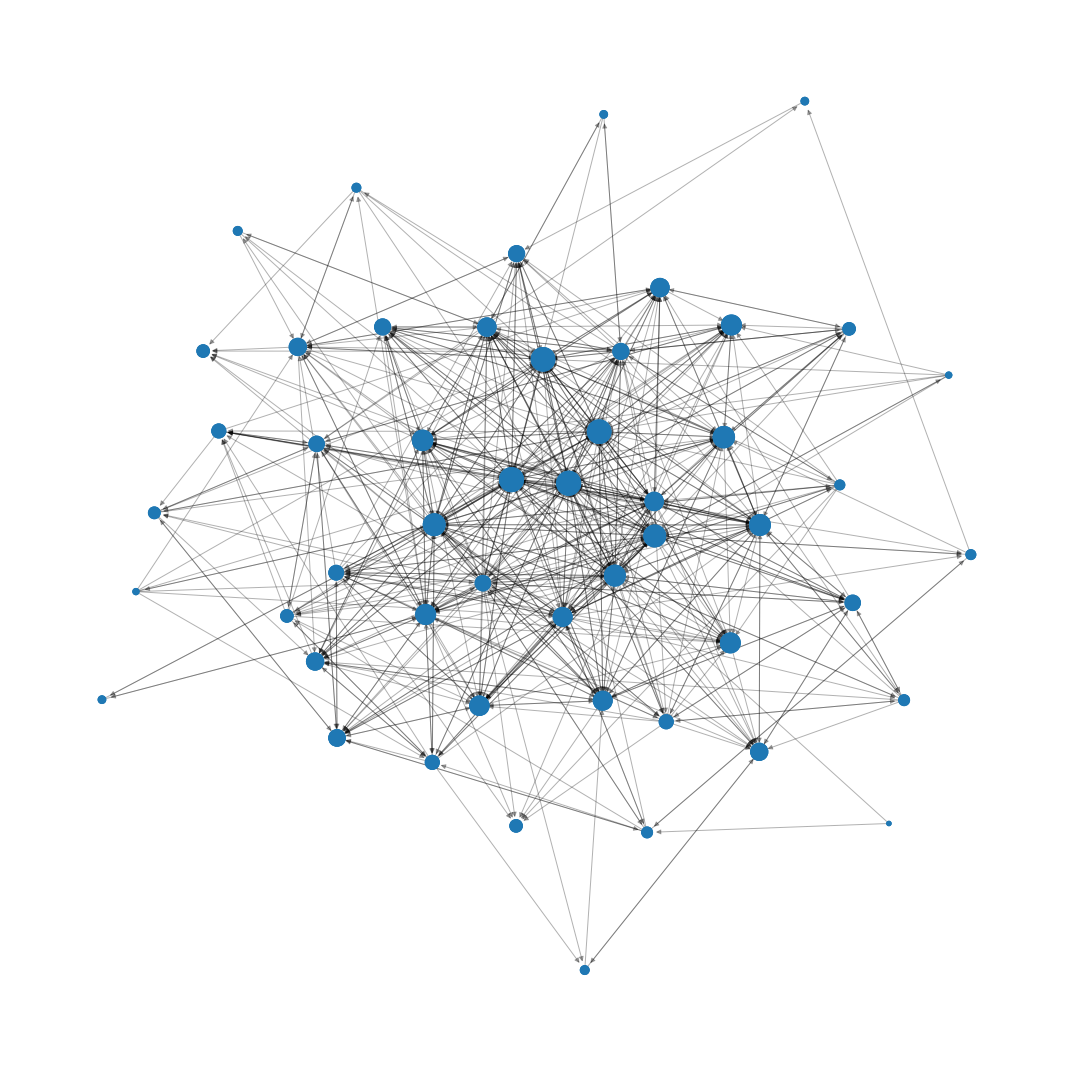

In [86]:
import time
os.system('cls' if os.name=='nt' else 'clear')
#Graph=nx.DiGraph()  # Establecer un grafo

plt.figure(figsize=(15,15))
# Layout
pos=nx.kamada_kawai_layout(graph)
#Drawing in plt using nx

u=nx.draw_networkx_nodes(graph, pos, node_size=inDegree, with_labels=True, cmap=plt.cm.viridis)
i=nx.draw_networkx_edges(graph, pos, alpha=0.3)

nx.draw_networkx_nodes(graph, pos, arrows=True, node_size=inDegree, with_labels=True)

#nx.draw_networkx(graph, pos, with_labes=True)
plt.axis('off')
plt.tight_layout()
#plt.savefig('network.png')

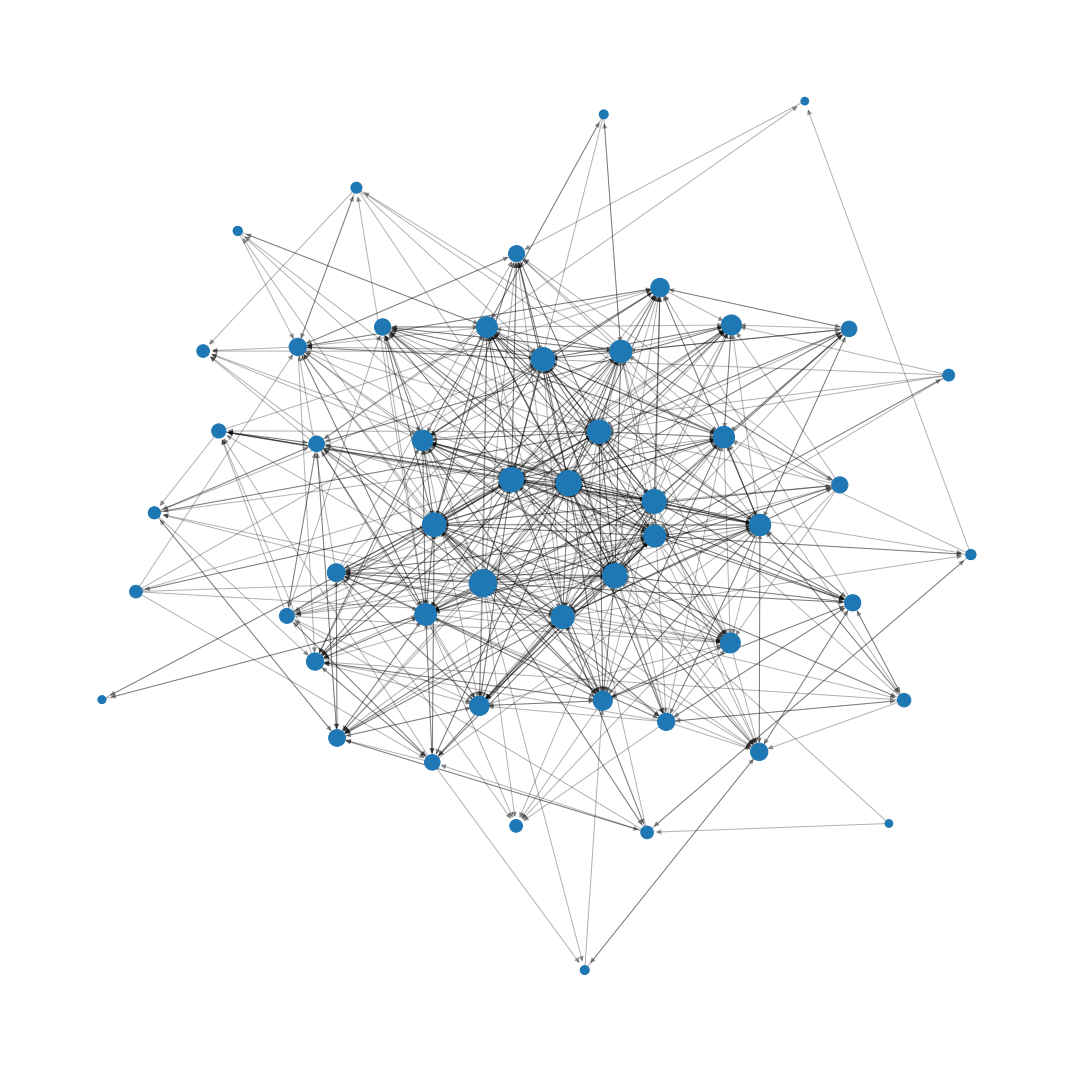

In [87]:
plt.figure(figsize=(15,15))
# Layout
pos=nx.kamada_kawai_layout(graph)
#Drawing in plt using nx

u=nx.draw_networkx_nodes(graph, pos, node_size=outDegree, with_labels=True, cmap=plt.cm.viridis)
i=nx.draw_networkx_edges(graph, pos, alpha=0.3)

nx.draw_networkx_nodes(graph, pos, arrows=True, node_size=inDegree, with_labels=True)

#nx.draw_networkx(graph, pos, with_labes=True)
plt.axis('off')
plt.tight_layout()
#plt.savefig('network.png')

In [21]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 375
Number of edges: 377
Average in degree:   1.0053
Average out degree:   1.0053


In [ ]:
print("The node which has highest degree is " ,max(dict(G.degree()).items(), key = lambda x : x[1]))

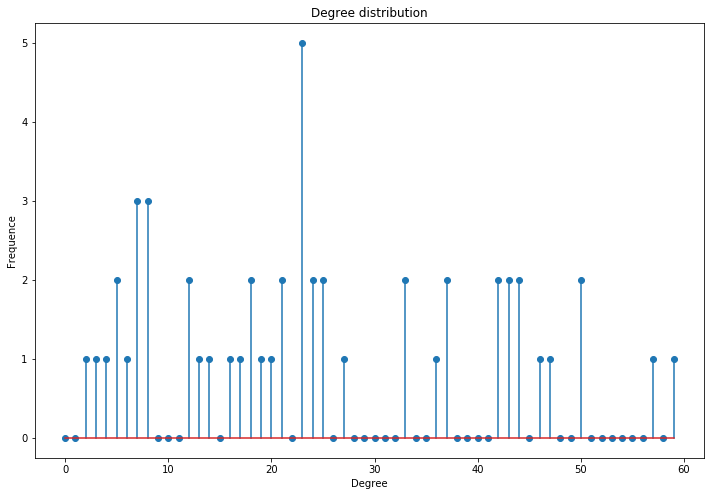

In [18]:
import numpy as np

# Degree Distribution (10 pts)
degree_freq = np.array(nx.degree_histogram(graph))
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.title("Degree distribution")
plt.ylabel("Frequence")
plt.xlabel("Degree")

plt.show()


In [23]:
print(" Is Lab Graph  strongly connected? \n",nx.is_strongly_connected(graph))
print(" Is Lab Graph  weakly connected? \n",nx.is_weakly_connected(graph))


 Is Lab Graph  strongly connected? 
 False
 Is Lab Graph  weakly connected? 
 True


In [24]:
#Average distance
avg_distance=nx.average_shortest_path_length(G)
print("Average distance: ",avg_distance)
# Diameter
Diameter=nx.diameter(G)
print("Diameter: ",Diameter)

#Radious
Radius=nx.radius(G)
print("Radius: ", Radius)

#Center
Center=nx.center(G)
print("Center: ", Center)

Average distance:  3.2960593903490683
Diameter:  6
Radius:  3
Center:  ['JoseAMeadeK']


In [25]:
import collections
from operator import itemgetter

degree = nx.degree_centrality(G)
SortedDC = sorted(degree.items(), key=itemgetter(1), reverse=True)

print("The most important nodes by degree centrality:")
for i,n in SortedDC[:4]:
    print("Node",i,"\tDegree centrality:%.4f"%n)

The most important nodes by degree centrality:
Node lopezobrador_ 	Degree centrality:0.7036
Node JoseAMeadeK 	Degree centrality:0.1644
Node RicardoAnayaC 	Degree centrality:0.0850
Node JaimeRdzNL 	Degree centrality:0.0794


In [26]:
Ccentrality = nx.closeness_centrality(G)
SortedCC = sorted(Ccentrality.items(), key=itemgetter(1), reverse=True)

print("The most important nodes by Closeness Centrality:")
for n,cc in SortedCC[:5]:
    print("Node",n, "\tCloseness Centrality %.4f"%cc)

The most important nodes by Closeness Centrality:
Node lopezobrador_ 	Closeness Centrality 0.5382
Node 210616158 	Closeness Centrality 0.4417
Node 2161144790 	Closeness Centrality 0.4417
Node 811682517959004162 	Closeness Centrality 0.4417
Node JoseAMeadeK 	Closeness Centrality 0.3748


In [27]:
SortedBC = sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)

print("The most important nodes by Betweenness Centrality:")
for n,bwc in SortedBC[:5]:
    print("Node",n, "\tBetweenness Centrality %.4f"%bwc)


The most important nodes by Betweenness Centrality:
Node lopezobrador_ 	Betweenness Centrality 0.9104
Node JoseAMeadeK 	Betweenness Centrality 0.4801
Node 210616158 	Betweenness Centrality 0.1388
Node 2161144790 	Betweenness Centrality 0.1388
Node 811682517959004162 	Betweenness Centrality 0.1388


In [28]:
pr = nx.pagerank(G, alpha=0.85)
SortedPR = sorted(pr.items(), key=itemgetter(1), reverse=True)

for n,EC in SortedPR[:5]:
    print("Node",n, "\tPageRank %.4f"%EC)

Node lopezobrador_ 	PageRank 0.3224
Node JoseAMeadeK 	PageRank 0.0687
Node JaimeRdzNL 	PageRank 0.0345
Node RicardoAnayaC 	PageRank 0.0340
Node 1185152769436422144 	PageRank 0.0014


In [ ]:
b=nx.closeness_centrality(kkg)
c=nx.betweenness_centrality(kkg)
a=nx.degree_centrality(kkg)

av=list(a.values())
bv=list(b.values())
cv=list(c.values())
nodes=list(a.keys())

Table = {'Node': nodes, 'Degree': av, 'Closeness': bv, 'Betweenness': cv,}
df = DataFrame(Table,columns= ['Node','Degree', 'Closeness', 'Betweenness'])
df = df.sort_values(['Closeness','Degree','Betweenness'], ascending=False)

df.head(10)